In [1]:
import pandas as pd
import numpy as np


# Predicting Credit Card Fraud
 


In [2]:
# The data is from https://www.kaggle.com/mlg-ulb/creditcardfraud


# Read the data 
# Change the path to whereever you save the dataset
df = pd.read_csv('../../Data/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Run the notebook with a memory usage reduction function so I can call it
%run MemoryShrink.ipynb

In [5]:
# Although it is a small dataset, I like to shrink down the datatypes
# Makes for faster calculations

df1 = reduce_mem_usage(df)

Memory usage of properties dataframe is : 67.3601303100586  MB
******************************
Column:  Time
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  V1
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V2
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V3
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V4
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V5
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V7
dtype before:  float64
dtype after:  float32
***************

In [6]:
# Set the dataframe to be the smaller memory usage 
del df
df = df1[0]

# Normalize the amount !!!!!!!!!!DIDNT HELP!!!!!!!!!!!!!!
# df["Amount"]=(df["Amount"]-df["Amount"].mean())/df["Amount"].std()

# Save to pickle file to preserce datatypes
df.to_pickle('../../Data/creditcard.pkl')


In [7]:
##
# Can start here in the future
##
df = pd.read_pickle('../../Data/creditcard.pkl')

In [8]:
# Import plot packages!
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams['figure.figsize'] = (40.0, 20.0)
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

0    284315
1       492
Name: Class, dtype: int64

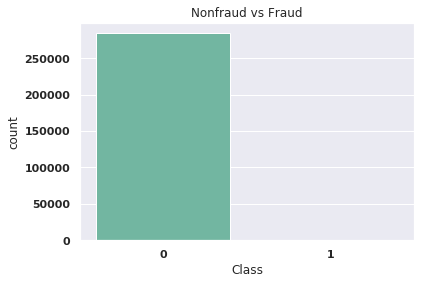

In [9]:

#Look at how many fraud cases we have!

sns.set(style="darkgrid")
plt.title('Nonfraud vs Fraud')
ax = sns.countplot(x="Class", data=df, palette='Set2')

df.Class.value_counts()

As you can see, there is a large imbalance

In [10]:
#Percentage of Fraud cases in Data

FraudPercentage = (len(df[df['Class']==1]) /len(df)) * 100

print("Fraud Percentage: %.4f%%" % (FraudPercentage))

Fraud Percentage: 0.1727%


## Undersampling

In [11]:
#Get number of fraud cases and their indices
num_fraud = len(df[df.Class == 1])
fraud_index = np.array(df[df.Class==1].index)

#Get all normal indices
normal_index = df[df.Class==0].index

#Select number of normal indices that are equal to number of fraud cases
rand_norm_ind = np.random.choice(normal_index, int(num_fraud*1.1), replace = False)
rand_norm_ind = np.array(rand_norm_ind)

#Create equal dataframe
equal_ind = np.concatenate([fraud_index,rand_norm_ind])
un_df = df.iloc[equal_ind, :]

# Take some data for dedicated test set at the end
dedtest_index = un_df.index
ded_test = np.random.choice(dedtest_index, 170, replace = False)
ded_test = np.array(ded_test)
test_df = df.iloc[ded_test, :]

In [12]:
# Drop the dedicated test data from equal dataframe
un_df = un_df.drop(index=test_df.index)

In [13]:
# Save dedicated test for the very end
test_df.to_pickle('../../Data/UndersampleTest.pkl')

0    451
1    412
Name: Class, dtype: int64

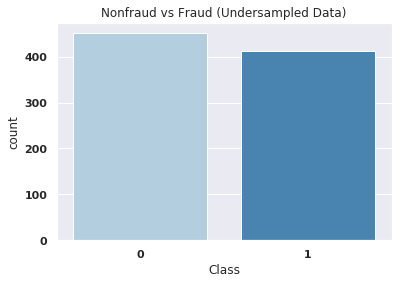

In [14]:
# Look at the undersampled datat
sns.set(style="darkgrid")
plt.title('Nonfraud vs Fraud (Undersampled Data)')
ax = sns.countplot(x="Class", data=un_df, palette='Blues')

un_df.Class.value_counts()

This is the data undersampled, with same amount of non frauds as frauds

In [15]:
# Remove Deprecation Warnings because they lokk

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
from sklearn.model_selection import train_test_split

# Create a test set
X, y = un_df.drop('Class',1), un_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


import xgboost as xgb

# Check it on an XGBClassifier
xg_cls = xgb.XGBClassifier(tree_method='gpu_exact')
xg_cls.fit(X_train,y_train)

preds = xg_cls.predict(X_test)

train_preds = xg_cls.predict(X_train)

In [17]:
# Accuracy tables on the training and test set

table_train = pd.crosstab(y_train, train_preds, margins=True)
table_test = pd.crosstab(y_test, preds, margins=True)
test_score = xg_cls.score(X_test, y_test) 
train_score = xg_cls.score(X_train, y_train) 

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '***********************************\n'
    '********** Under Sampled ***********\n'
    '***********************************\n\n'    
    'Training set accuracy:\n'
    'Percent Type I errors:  {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    
    'Test set accuracy:\n'
    'Percent Type I errors: {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    '***********************************\n'
    '* Type I errors are normal purchases that have been flagged.\n'
    '* Type II errors are frauds that are not caught!\n'
).format(train_tI_errors, train_tII_errors, train_score, test_tI_errors, test_tII_errors, test_score))

***********************************
********** Under Sampled ***********
***********************************

Training set accuracy:
Percent Type I errors:  0.00000000
Percent Type II errors: 0.00000000
Score: 1.00000000

Test set accuracy:
Percent Type I errors: 0.02890173
Percent Type II errors: 0.02890173
Score: 0.94219653

***********************************
* Type I errors are normal purchases that have been flagged.
* Type II errors are frauds that are not caught!



In [27]:
un_df.to_pickle('../../Data/creditcardUNDER.pkl')

## Correlation Matrix / Feature Selection

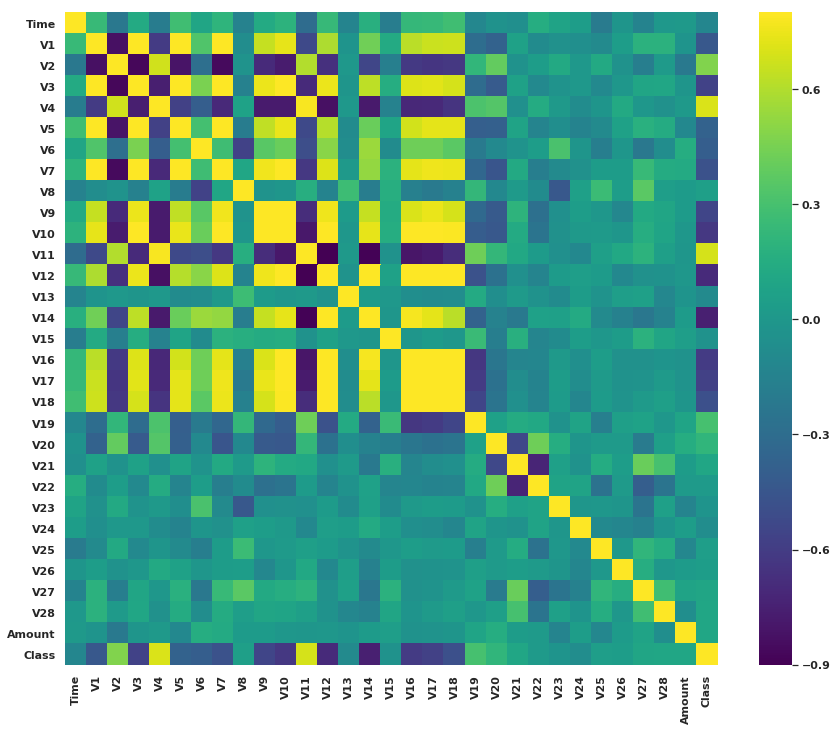

In [28]:
un_df = pd.read_pickle('../../Data/creditcardUNDER.pkl')
# Make the correlation matrix.
corrmat = un_df.corr()

f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corrmat, vmax=.8, square=True, cmap='viridis')
plt.show()

In [29]:
# Create correlation matrix
corr_matrix = un_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [30]:
# Column to drop
to_drop

['V17']

In [64]:
# Drop features 
df1 = un_df.drop(to_drop, axis=1)

In [65]:
# Create a test set
X, y = df1.drop('Class',1), df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


# Check it on an XGBClassifier
xg_cls = xgb.XGBClassifier(tree_method='gpu_exact')
xg_cls.fit(X_train,y_train)

preds = xg_cls.predict(X_test)

train_preds = xg_cls.predict(X_train)

In [66]:
# Accuracy tables on the training and test set

table_train = pd.crosstab(y_train, train_preds, margins=True)
table_test = pd.crosstab(y_test, preds, margins=True)
test_score = xg_cls.score(X_test, y_test) 
train_score = xg_cls.score(X_train, y_train) 

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '***********************************\n'
    '*********** Exclude V17 ***********\n'
    '***********************************\n\n'    
    'Training set accuracy:\n'
    'Percent Type I errors:  {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    
    'Test set accuracy:\n'
    'Percent Type I errors: {:.8f}\n'
    'Percent Type II errors: {:.8f}\n'
    'Score: {:.8f}\n\n'
    '***********************************\n'
    '* Type I errors are normal purchases that have been flagged.\n'
    '* Type II errors are frauds that are not caught!\n'
).format(train_tI_errors, train_tII_errors, train_score, test_tI_errors, test_tII_errors, test_score))

***********************************
*********** Exclude V17 ***********
***********************************

Training set accuracy:
Percent Type I errors:  0.00000000
Percent Type II errors: 0.00144928
Score: 0.99855072

Test set accuracy:
Percent Type I errors: 0.00578035
Percent Type II errors: 0.04624277
Score: 0.94797688

***********************************
* Type I errors are normal purchases that have been flagged.
* Type II errors are frauds that are not caught!



# Features Selection

In [67]:
# Import plot packages!
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams['figure.figsize'] = (40.0, 20.0)
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

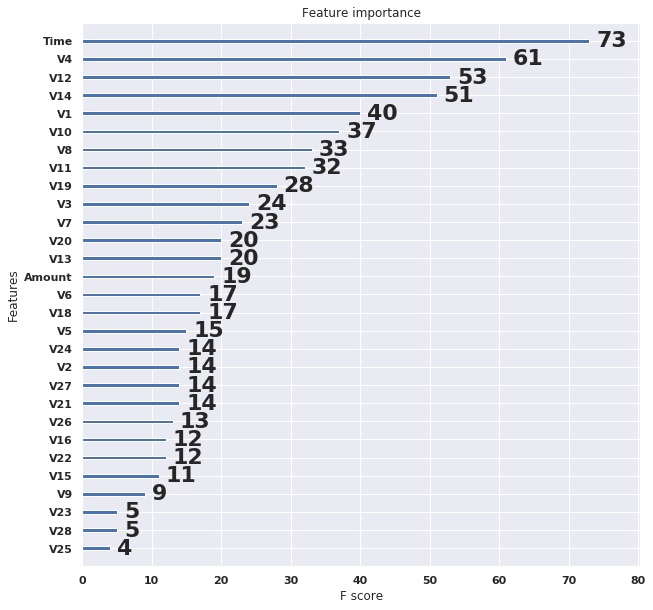

In [73]:
# Look at feature importance
xgb.plot_importance(xg_cls)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [36]:
# Create a test set
X, y = df1.drop('Class',1), df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


In [37]:
from sklearn import feature_selection
from sklearn.metrics import accuracy_score

listo = []

# Run the model with a different amount of features
# Start by the ones with most importance
thresholds = np.sort(xg_cls.feature_importances_)[::-1]
for thresh in thresholds:
    # select features using threshold
    selection = feature_selection.SelectFromModel(xg_cls, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = xgb.XGBClassifier(tree_method='gpu_exact')
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    preds = selection_model.predict(select_X_test)
    test_score = xg_cls.score(X_test, y_test)
    
    table_test = pd.crosstab(y_test, preds, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
 
    accuracy = accuracy_score(y_test, preds)
    # Save to list so we can graph it
    listo.append([thresh, select_X_train.shape[1], test_tI_errors, test_tII_errors, accuracy*100.0, test_score])
    
    print("Thresh=%.3f, n=%d, Type I=%.8f, Type II=%.8f, Accuracy: %.4f%%" % (thresh, select_X_train.shape[1], test_tI_errors, test_tII_errors, accuracy*100.0))

Thresh=0.106, n=1, Type I=0.13294798, Type II=0.21965318, Accuracy: 64.7399%
Thresh=0.088, n=2, Type I=0.03468208, Type II=0.06358382, Accuracy: 90.1734%
Thresh=0.077, n=3, Type I=0.01156069, Type II=0.04046243, Accuracy: 94.7977%
Thresh=0.074, n=4, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3757%
Thresh=0.058, n=5, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3757%
Thresh=0.054, n=6, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3757%
Thresh=0.048, n=7, Type I=0.00578035, Type II=0.04624277, Accuracy: 94.7977%
Thresh=0.046, n=8, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3757%
Thresh=0.041, n=9, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3757%
Thresh=0.035, n=10, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3757%
Thresh=0.033, n=11, Type I=0.00578035, Type II=0.04624277, Accuracy: 94.7977%
Thresh=0.029, n=13, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3757%
Thresh=0.029, n=13, Type I=0.00578035, Type II=0.04046243, Accuracy: 95.3

In [38]:
dffeat = pd.DataFrame(listo, columns=['Thresh', 'N_Features', 'Type_I', 'Type_II', 'Accuracy', 'Score'])

In [39]:
low_point = dffeat[dffeat['Type_II']==dffeat.Type_II.min()]

In [40]:
# Note, sometimes it jumps up by 2 features because they have the same importance


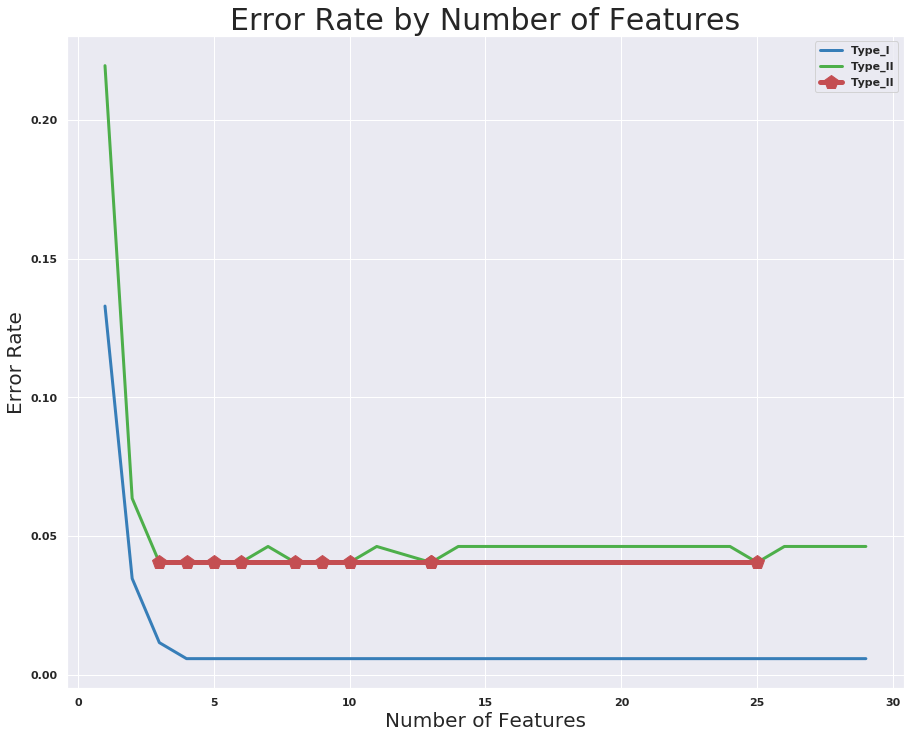

Low point for Type II 

    N_Features    Type_I   Type_II   Accuracy     Score
2            3  0.011561  0.040462  94.797688  0.947977
3            4  0.005780  0.040462  95.375723  0.947977
4            5  0.005780  0.040462  95.375723  0.947977
5            6  0.005780  0.040462  95.375723  0.947977
7            8  0.005780  0.040462  95.375723  0.947977
8            9  0.005780  0.040462  95.375723  0.947977
9           10  0.005780  0.040462  95.375723  0.947977
11          13  0.005780  0.040462  95.375723  0.947977
12          13  0.005780  0.040462  95.375723  0.947977
24          25  0.005780  0.040462  95.375723  0.947977


In [41]:
palette = plt.get_cmap('Set1')
plt.subplots(figsize=(15, 12))
plt.title('Error Rate by Number of Features', fontsize=30)
plt.plot( 'N_Features', 'Type_I', data=dffeat, marker='',linewidth=3, color=palette(1))
plt.plot( 'N_Features', 'Type_II', data=dffeat, marker='', linewidth=3, color=palette(2))
plt.plot( 'N_Features', 'Type_II', data=low_point,MarkerSize=15, marker='p',linewidth=5, color='r')
plt.xlabel('Number of Features',fontsize=20, fontweight=0)
plt.ylabel('Error Rate',fontsize=20, fontweight=0)
plt.legend()
plt.show()

print('Low point for Type II \n\n' + str(low_point.drop('Thresh',1)))

In [42]:
# Find the cutoff point
if len(low_point.N_Features.values) >= 1:
    num = round(len(low_point.N_Features.values)/2)
else:
    num = 0

In [43]:
# Create a list of feature importance and their names
listoff=[]
for feature in zip(list(df1), xg_cls.feature_importances_):
    listoff.append(feature)
    print(feature)

('Time', 0.105797105)
('V1', 0.057971016)
('V2', 0.020289855)
('V3', 0.034782607)
('V4', 0.088405795)
('V5', 0.02173913)
('V6', 0.02463768)
('V7', 0.033333335)
('V8', 0.047826085)
('V9', 0.013043478)
('V10', 0.05362319)
('V11', 0.046376813)
('V12', 0.0768116)
('V13', 0.028985508)
('V14', 0.073913045)
('V15', 0.01594203)
('V16', 0.017391304)
('V18', 0.02463768)
('V19', 0.04057971)
('V20', 0.028985508)
('V21', 0.020289855)
('V22', 0.017391304)
('V23', 0.007246377)
('V24', 0.020289855)
('V25', 0.0057971017)
('V26', 0.01884058)
('V27', 0.020289855)
('V28', 0.007246377)
('Amount', 0.027536232)


In [44]:
# Sort the list and remove all but the top 19 features

listoff.sort(key=lambda tup: tup[1])
features_drop = []
for elem in listoff[:-25]:
    features_drop.append(elem[0])
    
# Append V17 which we dropped earlier
features_drop.append('V17')

In [45]:
features_drop

['V25', 'V23', 'V28', 'V9', 'V17']

In [46]:
# get up sampled df
dfold = pd.read_pickle(('../../Data/creditcardUNDER.pkl'))

In [47]:
# drop the features we don't want
dfnew = dfold.drop(features_drop,1)

In [48]:
# Save it so we have something to use in the future
dfnew.to_pickle(('../../Data/creditcardSELECTun.pkl'))

# Parameter Tuning

In [49]:
import pandas as pd
import numpy as np

# Open up the data with selected features
df = pd.read_pickle(('../../Data/creditcardSELECTun.pkl'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 541 to 73356
Data columns (total 26 columns):
Time      863 non-null uint32
V1        863 non-null float32
V2        863 non-null float32
V3        863 non-null float32
V4        863 non-null float32
V5        863 non-null float32
V6        863 non-null float32
V7        863 non-null float32
V8        863 non-null float32
V10       863 non-null float32
V11       863 non-null float32
V12       863 non-null float32
V13       863 non-null float32
V14       863 non-null float32
V15       863 non-null float32
V16       863 non-null float32
V18       863 non-null float32
V19       863 non-null float32
V20       863 non-null float32
V21       863 non-null float32
V22       863 non-null float32
V24       863 non-null float32
V26       863 non-null float32
V27       863 non-null float32
Amount    863 non-null float32
Class     863 non-null uint8
dtypes: float32(24), uint32(1), uint8(1)
memory usage: 91.9 KB


In [50]:
from sklearn.model_selection import train_test_split
# Get training data
X, y = df.drop('Class',1), df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [51]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

max_depth = [3, 5, 10, 15, 20]
n_estimators = [10, 30, 50, 100, 150, 200, 250]
listy =[]

# Go through multiple depths and n_estimators to find best parameters

for max_d in max_depth:
    for n_est in n_estimators:
        
        # train model
        model = xgb.XGBClassifier(n_estimators=n_est, max_depth=max_d, tree_method='gpu_exact')
        model.fit(X_train, y_train)

        # eval model
        preds = model.predict(X_test)
        table_test = pd.crosstab(y_test, preds, margins=True)
        test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
        test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
        accuracy = accuracy_score(y_test, preds)
        test_score = model.score(X_test, y_test)

        # Save to list so we can graph it
        listy.append([max_d, n_est, test_tI_errors, test_tII_errors, accuracy*100.0, test_score])
        print("max_depth=%.3f, n_estimators=%d, Type I=%.10f, Type II=%.10f, Accuracy: %.4f%%" % (max_d, n_est, test_tI_errors, test_tII_errors, accuracy*100.0))

max_depth=3.000, n_estimators=10, Type I=0.0057803468, Type II=0.0520231214, Accuracy: 94.2197%
max_depth=3.000, n_estimators=30, Type I=0.0057803468, Type II=0.0462427746, Accuracy: 94.7977%
max_depth=3.000, n_estimators=50, Type I=0.0057803468, Type II=0.0462427746, Accuracy: 94.7977%
max_depth=3.000, n_estimators=100, Type I=0.0057803468, Type II=0.0404624277, Accuracy: 95.3757%
max_depth=3.000, n_estimators=150, Type I=0.0057803468, Type II=0.0404624277, Accuracy: 95.3757%
max_depth=3.000, n_estimators=200, Type I=0.0057803468, Type II=0.0404624277, Accuracy: 95.3757%
max_depth=3.000, n_estimators=250, Type I=0.0057803468, Type II=0.0404624277, Accuracy: 95.3757%
max_depth=5.000, n_estimators=10, Type I=0.0115606936, Type II=0.0462427746, Accuracy: 94.2197%
max_depth=5.000, n_estimators=30, Type I=0.0057803468, Type II=0.0404624277, Accuracy: 95.3757%
max_depth=5.000, n_estimators=50, Type I=0.0057803468, Type II=0.0404624277, Accuracy: 95.3757%
max_depth=5.000, n_estimators=100, T

In [52]:
dfest = pd.DataFrame(listy, columns=['Max_Depth', 'N_Estimators', 'Type_I', 'Type_II', 'Accuracy', 'Score'])

In [53]:
dfest

,Max_Depth,N_Estimators,Type_I,Type_II,Accuracy,Score
0,3,10,0.005780,0.052023,94.219653,0.942197
1,3,30,0.005780,0.046243,94.797688,0.947977
2,3,50,0.005780,0.046243,94.797688,0.947977
3,3,100,0.005780,0.040462,95.375723,0.953757
4,3,150,0.005780,0.040462,95.375723,0.953757
5,3,200,0.005780,0.040462,95.375723,0.953757
6,3,250,0.005780,0.040462,95.375723,0.953757
7,5,10,0.011561,0.046243,94.219653,0.942197
8,5,30,0.005780,0.040462,95.375723,0.953757
9,5,50,0.005780,0.040462,95.375723,0.953757


Text(0,0.5,'Error Rate')

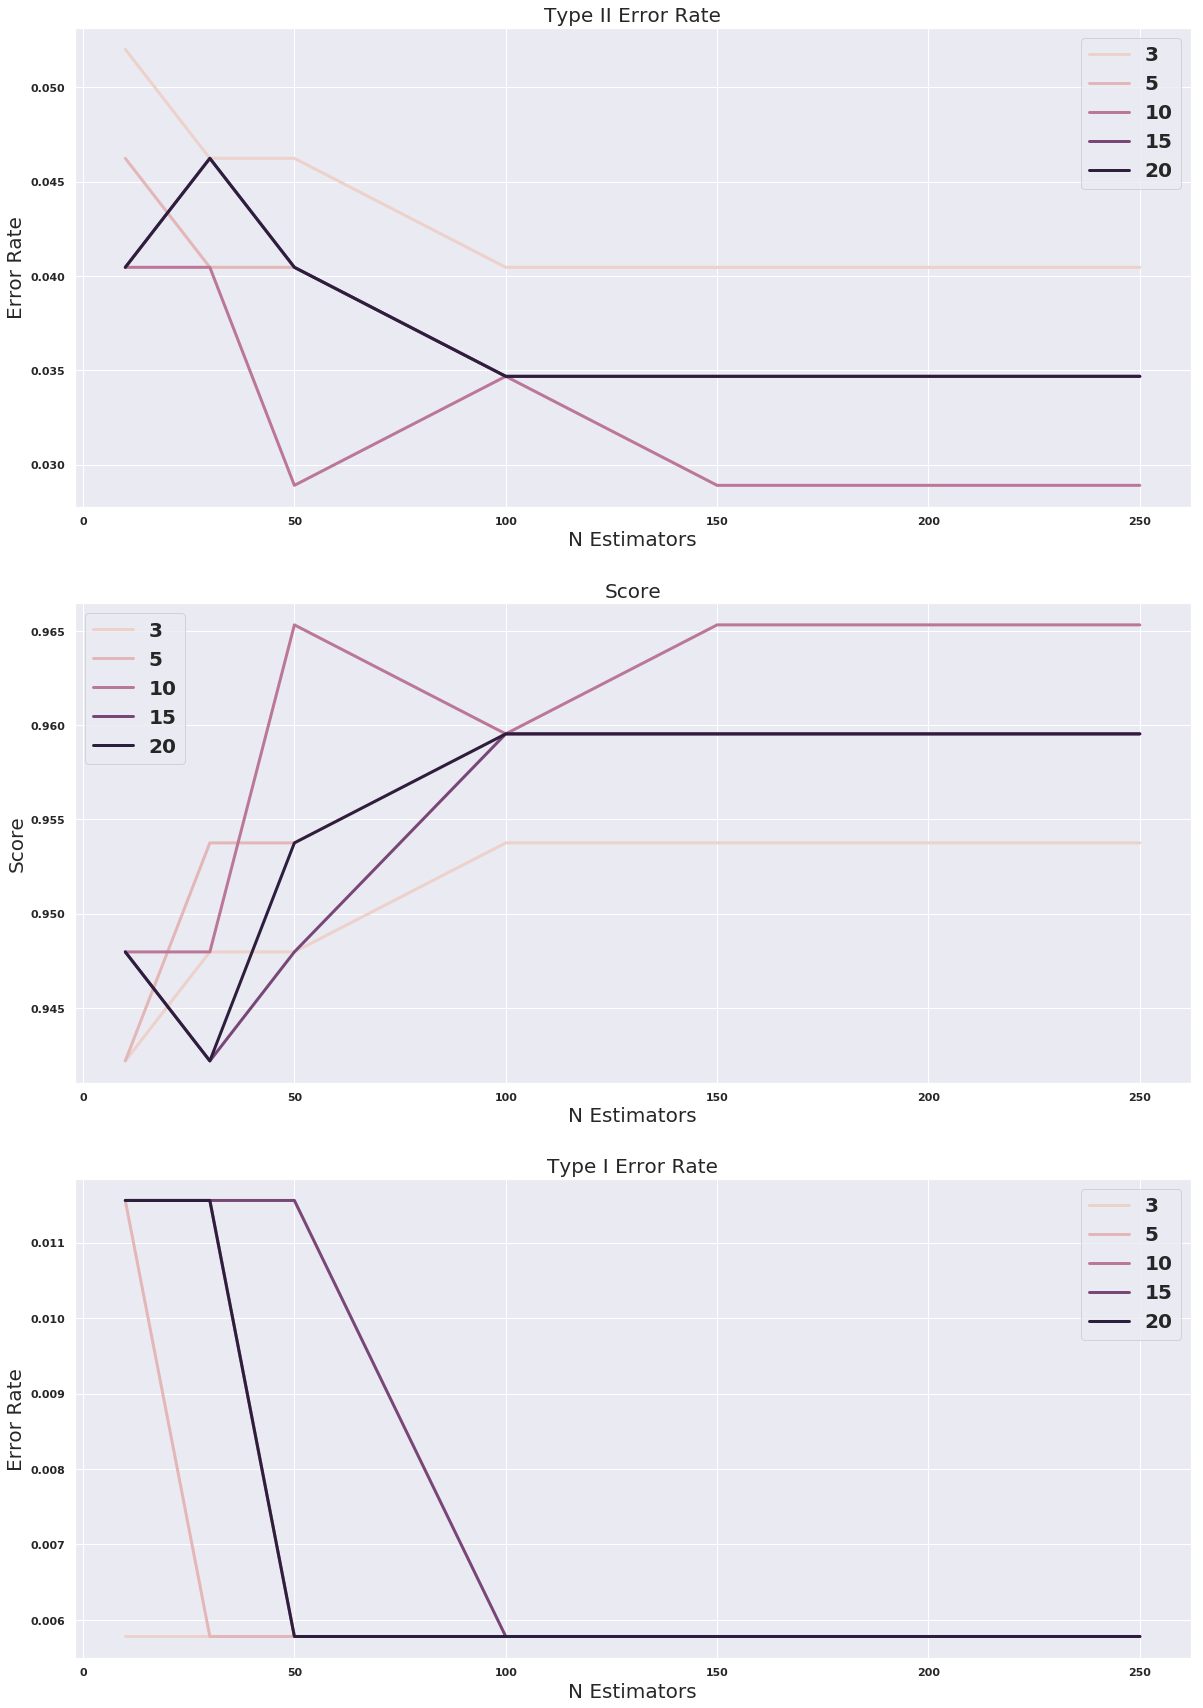

In [54]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.title('Type II Error Rate', fontsize=20)
ax = sns.lineplot(x="N_Estimators", y="Type_II", hue='Max_Depth', data=dfest, linewidth=3)
plt.legend(['3','5','10','15','20'], fontsize=20)
plt.xlabel('N Estimators',fontsize=20, fontweight=0)
plt.ylabel('Error Rate',fontsize=20, fontweight=0)

plt.subplot(3,1,2)
plt.title('Score', fontsize=20)
f = sns.lineplot(x="N_Estimators", y="Score", hue='Max_Depth', data=dfest, linewidth=3)
plt.legend(['3','5','10','15','20'], fontsize=20)
plt.xlabel('N Estimators',fontsize=20, fontweight=0)
plt.ylabel('Score',fontsize=20, fontweight=0)

plt.subplot(3,1,3)
plt.title('Type I Error Rate', fontsize=20)
ax = sns.lineplot(x="N_Estimators", y="Type_I", hue='Max_Depth', data=dfest, linewidth=3)
plt.legend(['3','5','10','15','20'], fontsize=20)
plt.xlabel('N Estimators',fontsize=20, fontweight=0)
plt.ylabel('Error Rate',fontsize=20, fontweight=0)

In [78]:
# Open up the data with selected features
df = pd.read_pickle(('../../Data/creditcardSELECTun.pkl'))


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 541 to 73356
Data columns (total 26 columns):
Time      863 non-null uint32
V1        863 non-null float32
V2        863 non-null float32
V3        863 non-null float32
V4        863 non-null float32
V5        863 non-null float32
V6        863 non-null float32
V7        863 non-null float32
V8        863 non-null float32
V10       863 non-null float32
V11       863 non-null float32
V12       863 non-null float32
V13       863 non-null float32
V14       863 non-null float32
V15       863 non-null float32
V16       863 non-null float32
V18       863 non-null float32
V19       863 non-null float32
V20       863 non-null float32
V21       863 non-null float32
V22       863 non-null float32
V24       863 non-null float32
V26       863 non-null float32
V27       863 non-null float32
Amount    863 non-null float32
Class     863 non-null uint8
dtypes: float32(24), uint32(1), uint8(1)
memory usage: 91.9 KB


In [80]:
# Open up the data with selected features
X, y = df.drop('Class',1), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# We use the lowest max depth and N_est that gets the best value (lower = better runtime)
model = xgb.XGBClassifier(n_estimators=150, max_depth=10, tree_method='gpu_exact')
model.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, tree_method='gpu_exact')

In [48]:
#features_drop =['V23', 'V21', 'V6', 'V24', 'V9', 'V15', 'V27', 'V5', 'V17']

In [81]:
dfold = pd.read_pickle(('../../Data/creditcard.pkl'))
dfold=dfold.drop(features_drop,1)
dftest = pd.read_pickle(('../../Data/UndersampleTest.pkl'))
dftest=dftest.drop(features_drop,1)

fX, fy = dfold.drop('Class',1), dfold['Class']

fulldatapreds = model.predict(dfold.drop('Class',1))
preds = model.predict(X_test)
testy = model.predict(dftest.drop('Class',1))

In [83]:
tX, ty = dftest.drop('Class',1), dftest['Class']

In [82]:
trainpred = model.predict(X_train)

In [94]:
from sklearn.model_selection import cross_val_score


print('Validation Set Cross Validation: ')
print(cross_val_score(model, X_test, y_test, cv=5))
print('\nDedicated Test Set Cross Validation: ')
print(cross_val_score(model, tX, ty, cv=5))
print('\nEntire Data Cross Validation: ')
print(cross_val_score(model, fX, fy, cv=5))

Validation Set Cross Validation: 
[0.88888889 0.97142857 0.91176471 0.97058824 0.85294118]

Dedicated Test Set Cross Validation: 
[0.94285714 0.97058824 0.94117647 1.         0.93939394]

Entire Data Cross Validation: 
[0.3281837  0.99957867 0.99913976 0.99959621 0.99938554]


In [93]:

print(cross_val_score(model, tX, ty, cv=5))

[0.94285714 0.97058824 0.94117647 1.         0.93939394]


In [84]:
# Accuracy tables on the training and test set

table_full = pd.crosstab(fy, fulldatapreds, margins=True)
table_test = pd.crosstab(y_test, preds, margins=True)
table_train = pd.crosstab(y_train, trainpred, margins=True)
table_ded = pd.crosstab(ty, testy, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

full_tI_errors = table_full.loc[0.0,1.0] / table_full.loc['All','All']
full_tII_errors = table_full.loc[1.0,0.0] / table_full.loc['All','All']

ded_tI_errors = table_ded.loc[0.0,1.0] / table_ded.loc['All','All']
ded_tII_errors = table_ded.loc[1.0,0.0] / table_ded.loc['All','All']

print((
    '***********************************\n\n'    
    'Train set accuracy:\n'
    'Percent Type I errors:  {:.15f}\n'
    'Percent Type II errors: {:.15f}\n\n'    
    'Validation set accuracy:\n'
    'Percent Type I errors: {:.15f}\n'
    'Percent Type II errors: {:.15f}\n\n'
    'Full set accuracy:\n'
    'Percent Type I errors:  {:.15f}\n'
    'Percent Type II errors: {:.15f}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors:  {:.15f}\n'
    'Percent Type II errors: {:.15f}\n\n'
    '***********************************\n'
    '* Type I errors are normal purchases that have been flagged.\n'
    '* Type II errors are frauds that are not caught!\n'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, full_tI_errors, full_tII_errors, ded_tI_errors, ded_tII_errors))

***********************************

Train set accuracy:
Percent Type I errors:  0.000000000000000
Percent Type II errors: 0.000000000000000

Validation set accuracy:
Percent Type I errors: 0.005780346820809
Percent Type II errors: 0.028901734104046

Full set accuracy:
Percent Type I errors:  0.035150119203531
Percent Type II errors: 0.000035111496557

Test set accuracy:
Percent Type I errors:  0.029411764705882
Percent Type II errors: 0.029411764705882

***********************************
* Type I errors are normal purchases that have been flagged.
* Type II errors are frauds that are not caught!



In [86]:
table_test

col_0,0,1,All
Class,,,
0,86,1,87
1,5,81,86
All,91,82,173


In [90]:
table_ded

col_0,0,1,All
Class,,,
0,86,5,91
1,5,74,79
All,91,79,170


In [87]:
table_train

col_0,0,1,All
Class,,,
0,363,0,363
1,0,327,327
All,363,327,690


In [88]:
table_full

col_0,0,1,All
Class,,,
0,274304,10011,284315
1,10,482,492
All,274314,10493,284807


In [89]:
10011/284315

0.0352109456061059

In [ ]:
probs = model.predict_proba(fX)[:,1]

In [ ]:
probs

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(fy, probs)


auc = roc_auc_score(fy, probs)
print('AUC: %.20f' % auc)

In [ ]:
from sklearn.metrics import recall_score

recall_score(fy, fulldatapreds)

In [ ]:
recall_score(y_test, preds)